# Linear Regression Assignment: BoomBikes

## Step 1: Reading and Understanding the Data

In [50]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Reading the csv file
bikes = pd.read_csv('day.csv', index_col='instant')

In [52]:
# Checking the first 5 columns of dataset
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
# Checking the number of rows and columns
bikes.shape

(730, 15)

### 1.1 Data Quality check

In [54]:
# Checking the info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [55]:
# Checking the percentage of null values in all columns
(bikes.isnull().sum()/len(bikes))*100

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- We can see that, there are no null values in any of the columns.

In [56]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- Values in all the columns seems to be valid.
- Some columns seems to be categorical in nature but, are present in integer or float type.
- We wil take care of such columns in the upcoming steps.

### 1.2 Data Cleaning

In [57]:
bikes.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [58]:
# Finding correlation between 'temp' and 'atemp'.
temp_cols = ['temp', 'atemp']
pd.DataFrame(np.corrcoef(bikes['temp'], bikes['atemp']), index=temp_cols, columns=temp_cols)

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


- We will drop the 'dteday' column as we already have 'mnth' and 'yr' columns.
- We will drop 'atemp' column as 'temp' and 'atemp' are very highly collinear. 
- We will also drop 'casual' and 'registered' columns as we have 'cnt' column which is sum of 'casual' and 'registered' columns. Also, our main aim is to predict the total bike rentals irrespective of 'casual' and 'registered'.
- We will create a new dataframe 'bike_rental' so that, original dataframe can be used for any further reference.

In [59]:
# Creating new dataframe by dropping 'dteday', 'atemp', 'casual' and 'registered' columns.
bike_rental = bikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt']]

In [60]:
# Checking the head of new dataframe
bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [61]:
# Checking the shape
bike_rental.shape

(730, 11)

### 1.3 Handling Categorical variables

- We have identified four categorical variables 'season', 'mnth', 'weekday' and 'weathersit' which needs the dummy variables to be created.
- Values are assigned to the categorical variables as explained in the Data Dictionary.
- Other categorical variables like 'yr', 'holiday' and 'workingday' are already in correct form.

In [62]:
#Assigning values to 'season' column as per the data dictionary.

bike_rental.loc[(bike_rental['season']== 1), 'season'] = 'spring'    # 1 --> spring

bike_rental.loc[(bike_rental['season']== 2), 'season'] = 'summer'    # 2 --> summer

bike_rental.loc[(bike_rental['season']== 3), 'season'] = 'fall'      # 3 --> fall

bike_rental.loc[(bike_rental['season']== 4), 'season'] = 'winter'    # 4 --> winter

In [63]:
# Checking the 'season' column
bike_rental['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [64]:
#Assigning values to 'mnth' column.
def month_map(x):
    return x.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

bike_rental[['mnth']] = bike_rental[['mnth']].apply(month_map)

In [65]:
# Checking the 'mnth' column
bike_rental['mnth'].astype('category').value_counts()

mnth
August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     56
Name: count, dtype: int64

In [66]:
#Assigning values to 'weekday' column.
def weekday_map(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'})

bike_rental[['weekday']] = bike_rental[['weekday']].apply(weekday_map)

In [67]:
# Checking the 'weekday' column
bike_rental['weekday'].astype('category').value_counts()

weekday
Mon      105
Tue      105
Fri      104
Sat      104
Sun      104
Thurs    104
Wed      104
Name: count, dtype: int64

In [68]:
#Assigning values to 'weathersit' column as per the data dictionary.

# 1 --> Clear, Few clouds, Partly cloudy, Partly cloudy
bike_rental.loc[(bike_rental['weathersit']== 1), 'weathersit'] = 'Clear'

# 2 --> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike_rental.loc[(bike_rental['weathersit']== 2), 'weathersit'] = 'Mist'    

# 3 --> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike_rental.loc[(bike_rental['weathersit']== 3), 'weathersit'] = 'Light Snow'

# 4 --> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_rental.loc[(bike_rental['weathersit']== 4), 'weathersit'] = 'Heavy Rain'

In [69]:
# Checking the 'weathersit' column
bike_rental['weathersit'].astype('category').value_counts()

weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [70]:
# Checking the 'yr' column
bike_rental['yr'].astype('category').value_counts()    # 0 --> 2018 and 1 --> 2019 as per data dictionary

yr
0    365
1    365
Name: count, dtype: int64

In [71]:
# Checking the 'workingday' column
#if a day is neither weekend nor a holiday it takes the value 1, otherwise 0 as per data dictionary.
bike_rental['workingday'].astype('category').value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [72]:
# Checking the 'holiday' column
# 0 --> not a holiday and 1 --> holiday as per data dictionary.
bike_rental['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

## Step 2: Visualising the Data

In [73]:
bike_rental.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [74]:
# Creating new dataframe containg only numerical variables.
NumVras = bike_rental[['temp', 'hum', 'windspeed', 'cnt']]

In [75]:
# Checking head
NumVras.head()

,temp,hum,windspeed,cnt
instant,,,,
1,14.110847,80.5833,10.749882,985
2,14.902598,69.6087,16.652113,801
3,8.050924,43.7273,16.636703,1349
4,8.200000,59.0435,10.739832,1562
5,9.305237,43.6957,12.522300,1600


### 2.1 Visualising Numeric Variables

<Figure size 2000x1800 with 0 Axes>

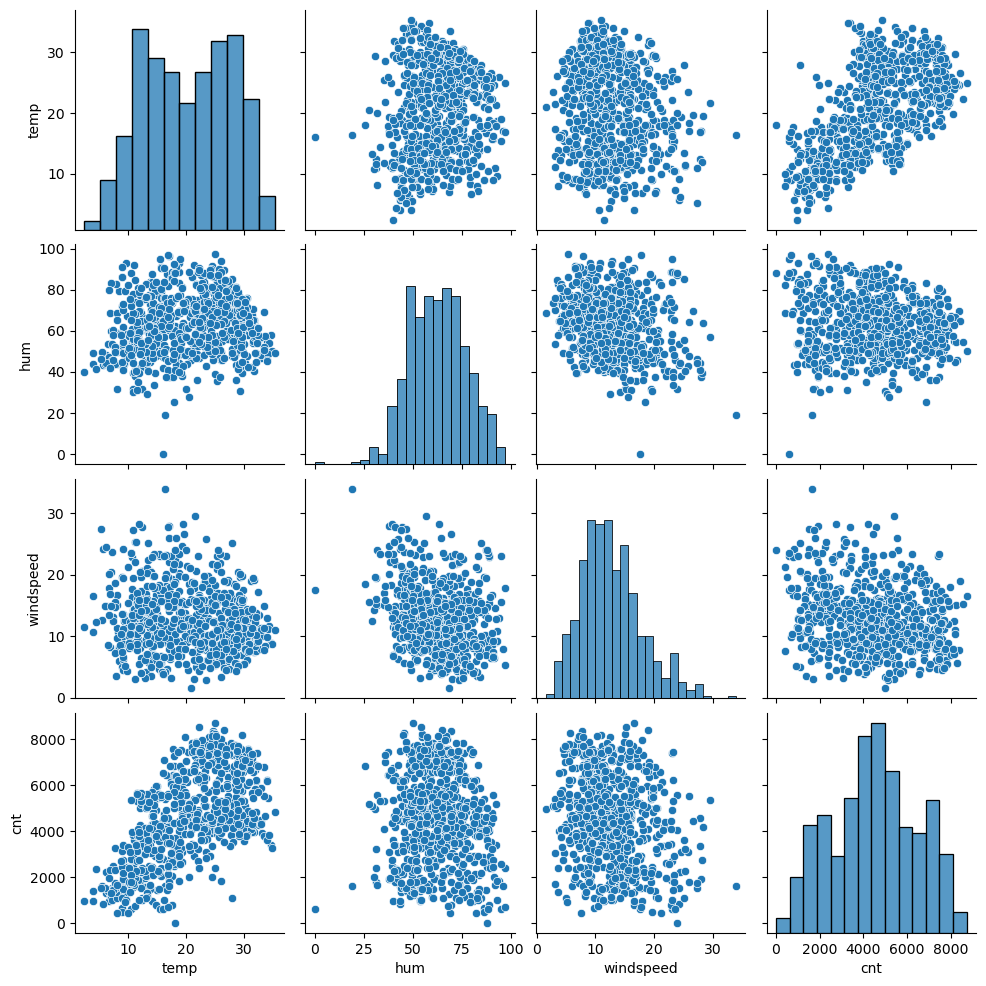

In [76]:
# Plotting pair plot for numerical variables
plt.figure(figsize=(20,18))
sns.pairplot(NumVras)
plt.show()

We can see that:
- There is collinearity between 'temp' and 'cnt'.
- There is some collinearity between 'hum' and 'windspeed'.
- There is also some collinearity between 'temp' and 'hum' and also between 'temp' and 'windspeed'.

### 2.2 Visualising Categorical Variables

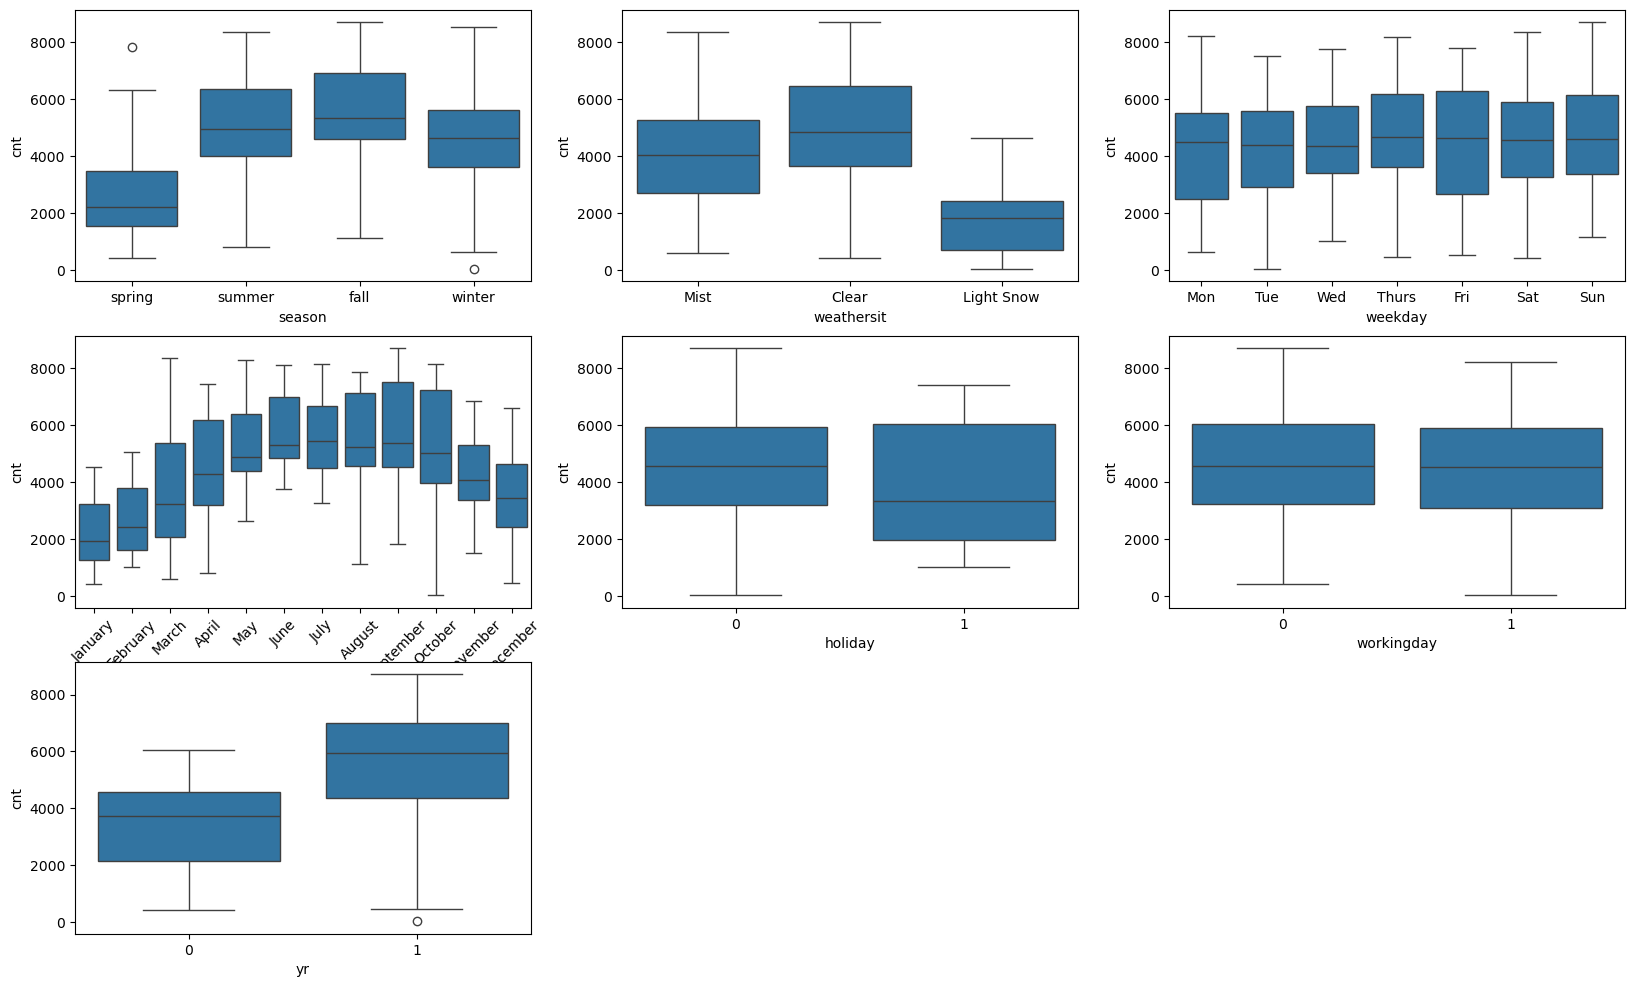

In [77]:
# Plotting boxplots for categorical variables.
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike_rental)
plt.subplot(3,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bike_rental)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bike_rental)
plt.subplot(3,3,4)
sns.boxplot(x='mnth', y='cnt', data=bike_rental)
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.boxplot(x='holiday', y='cnt', data=bike_rental)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_rental)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=bike_rental)
plt.show()

We can see that:
- Season: Most number of bike bookings are happening in FALL season and least number of bike bookings in SPRING season. SUMMER and WINTER seasons have decent number of bookings.
- Weathersit: Highest number of bike bookings are seen in CLEAR weather and low number of bookings in LIGHT SNOW weather conditions.
- Weekday: All the weekdays are performing almost equally well with not much difference in number of bookings.
- Mnth: JUNE, JULY, AUGUST and SEPTEMBER have high number of bookings while JANUARY and FEBRUARY have low bookings.
- Holiday: Non-holiday days seems to be performing well than holidays.
- Workingday: Both working days and non-working days are performing equally well.
- Year: Number of bookings have increased significantly in 2019 compared to 2018.

### 2.3 Heatmap for Numerical variables

In [78]:
Numcorr = NumVras.corr()
Numcorr

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


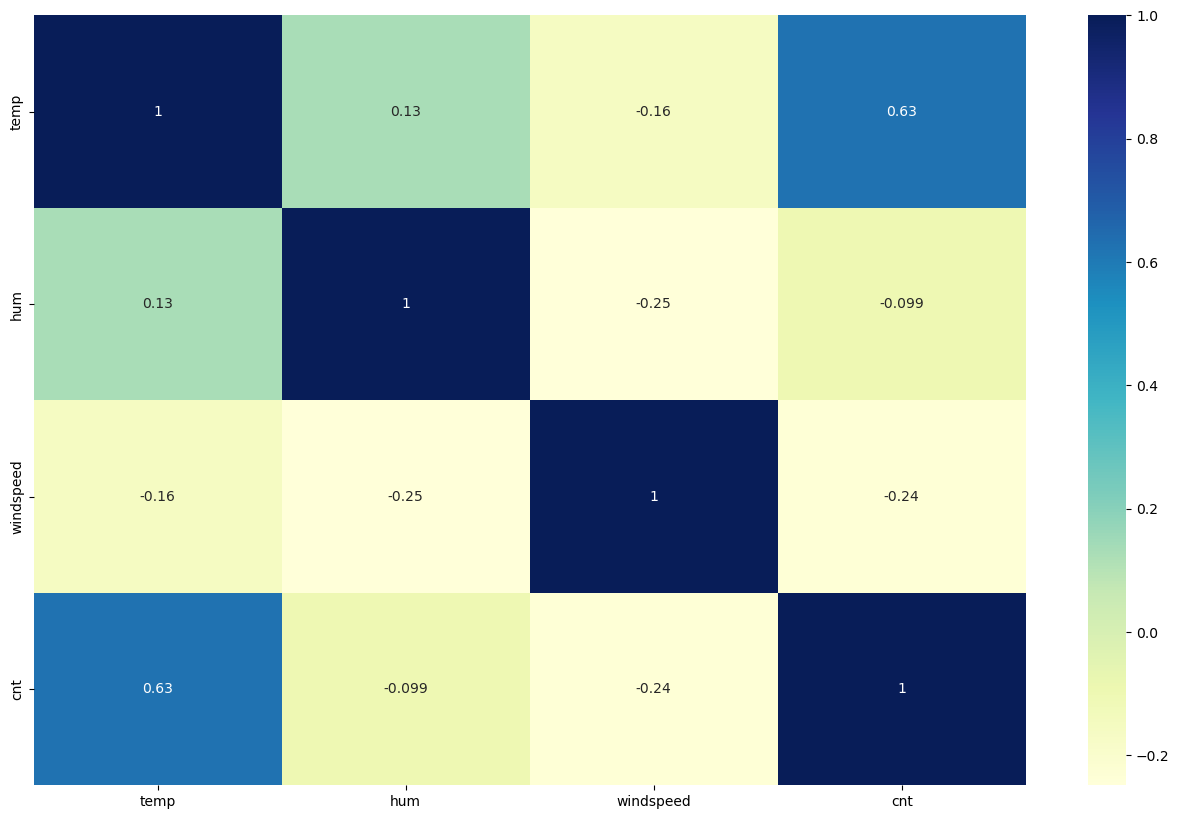

In [79]:
# checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(Numcorr, annot = True, cmap="YlGnBu")
plt.show()

## Step 3: Data Preparation

In [80]:
# Creating a dataframe containing variables for which dummy variables needs to be created.
CategoricalVars = bike_rental[['season', 'mnth', 'weathersit', 'weekday']]
CategoricalVars.head()

,season,mnth,weathersit,weekday
instant,,,,
1,spring,January,Mist,Mon
2,spring,January,Mist,Tue
3,spring,January,Clear,Wed
4,spring,January,Clear,Thurs
5,spring,January,Clear,Fri


### 3.1 Creating Dummy variables

In [81]:
# Creating the dummies and dropping the first dummy variable for each variable.
bike_dummies = pd.get_dummies(CategoricalVars, drop_first=True).astype(int)
bike_dummies.shape

(730, 22)

In [82]:
# Dropping the original categorical variables from the dataframe
bike_rental = bike_rental.drop(list(CategoricalVars.columns), axis=1)
bike_rental.shape

(730, 7)

In [83]:
# Concatting the 'bikes101' and 'bike_dummies' dataframes and storing it in a new dataframe.
bike_rental_new = pd.concat([bike_rental, bike_dummies],axis=1)
bike_rental_new.shape

(730, 29)

In [84]:
bike_rental_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [85]:
# Importing 'train_test_split' from 'sklearn' library.
from sklearn.model_selection import train_test_split

# Splitting the data into train and test dataframes.
df_train, df_test = train_test_split(bike_rental_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [86]:
# Checking the shape of train dataframe.
df_train.shape

(510, 29)

In [87]:
# Checking the shape of test dataframe.
df_test.shape

(219, 29)

### 4.1 Rescaling the Features

In [88]:
# Importing 'MinMaxScaler' from 'sklearn' library.
from sklearn.preprocessing import MinMaxScaler

In [89]:
# Creating an object of 'MinMaxScaler' class.
scaler = MinMaxScaler()

In [90]:
# Applying 'scaler()' to all the columns except the 'yes-no'/'1-0' and 'dummy' variables.
df_train[list(NumVras.columns)] = scaler.fit_transform(df_train[list(NumVras.columns)])

In [91]:
# Checking head of df_train.
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,0,0,1
577,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,1
427,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,1,0,0,0
729,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
483,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [92]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


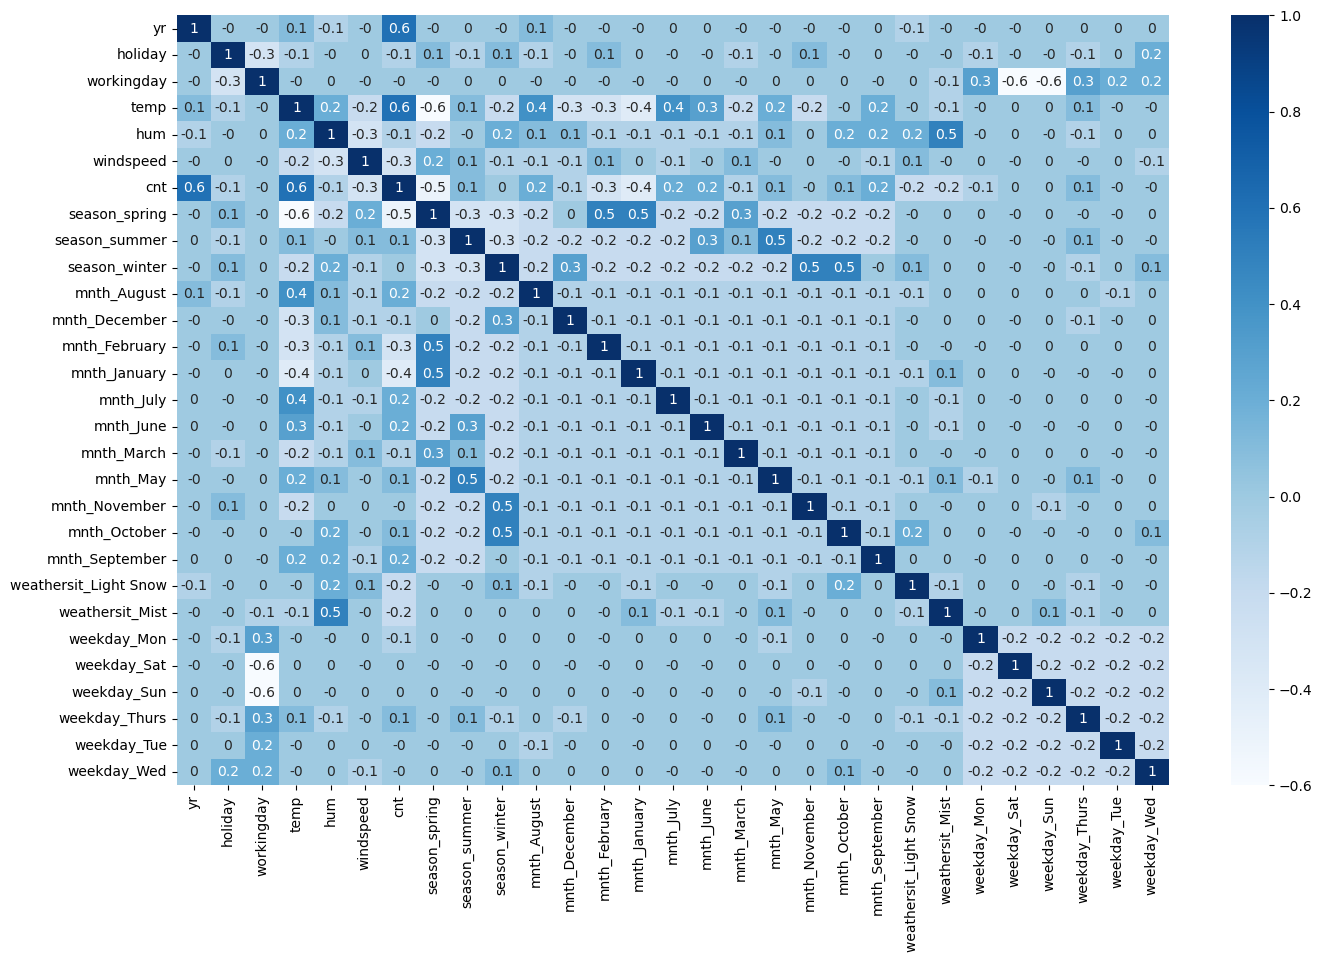

In [93]:
# Let's check the correlation coefficients to see variables which are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(round(df_train.corr(),1), annot = True, cmap="Blues")
plt.show()

We can see that:
- No variables are highly correlated to each other. So, we can proceed for model building.

### 4.2 Dividing the train data into X and Y sets for the model building

In [94]:
# Dividing the data in X_train and y_train.
y_train = df_train.pop('cnt')
X_train = df_train

In [95]:
# Checking the head.
y_train.head()

instant
654    0.864243
577    0.827658
427    0.465255
729    0.204096
483    0.482973
Name: cnt, dtype: float64

In [96]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
577,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
427,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
729,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
483,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


## Step 5: Building a linear model

We have 28 predictors to predict and build a model. So, we will use RFE (Recursive Feature Elimination) process which will provide us the features ranked in the order of their importance of impacting the outcome variable.

We have to pass a number in the RFE function (in this case, we will pass 15), by this the function will rank the most important 15 features as 1.

### 5.1 RFE (Recursive Feature Elimination)

In [97]:
# Importing 'RFE' and 'LinearRegression' from 'sklearn' library.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [100]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thurs', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10)]

- RFE has successfully provided 15 features but, it does not mean that these features will form a perfect model. We will evaluate while building the model and will add or remove the features as required.

In [102]:
# Selecting the columns with rank 1.
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_August', 'mnth_February', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_October', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [104]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[rfe_cols]

### 5.2 Function for calculating VIF

In [105]:
# Importing 'variance_inflation_factor' from 'statsmodels' library.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_df_vif(local_df):
    df_vif = pd.DataFrame()
    df_vif['Features'] = local_df.columns
    df_vif['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif = df_vif.sort_values(by='VIF', ascending=False)
    df_vif = df_vif.reset_index(drop=True)
    return df_vif

### 5.2 Building model using statsmodel

In [106]:
# Importing 'statsmodels' library.
import statsmodels.api as sm
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

#### 5.2.1 First Model

In [107]:
# Running the linear model
lr_model = sm.OLS(y_train, X_train_rfe).fit()

In [108]:
# Checking the summary of linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.34e-189
Time:                        09:10:35   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

- Calculating VIF

In [109]:
# Calculating the VIF
get_df_vif(X_train_rfe)

,Features,VIF
0,const,82.48
1,season_spring,5.27
2,temp,4.42
3,season_winter,3.83
4,season_summer,2.76
5,hum,1.93
6,mnth_November,1.76
7,mnth_January,1.68
8,weathersit_Mist,1.57
9,mnth_December,1.49


From the above model, we can see that:
- All the features have p-value less than 0.05.
- But, VIF value of 'season_spring' feature is 5.27 and feature with VIF value above 5 can be dropped.

#### 5.2.2 Second Model

In [110]:
# Dropping 'season_spring'.
X_train_rfe = X_train_rfe.drop(['season_spring'], axis=1)

In [111]:
# Running the linear model and checking the summary.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train, X_train_rfe).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.54e-188
Time:                        09:10:36   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2563      0.029      8.912      0.000       0.200       0.313
yr                        0.2289      0.008     28.178      0.000       0.213       0.245
holiday                  -0.0947      0.026     -3.680      0.000      -0.145      -0.044
temp                      0.5540      0.027     20.510      0.000       0.501       0.607
hum                      -0.1723      0.038     -4.553      0.000      -0.247      -0.098
windspeed                -0.1969      0.026     -7.633      0.000      -0.248      -0.146
season_summer             0.0716      0.011      6.423      0.000       0.050       0.094
season_winter             0.1387      0.013     10.412      0.000       0.113       0.165
mnth_December            -0.0312      0.017     -1.786      0.075      -0.066       0.003
mnth_January             -0.0476      0.018     -2.613      0.009      -0.083      -0.012
mnth_July                -0.0454      0.018     -2.520      0.012      -0.081      -0.010
mnth_November            -0.0310      0.019     -1.674      0.095      -0.067       0.005
mnth_September            0.0899      0.016      5.549      0.000       0.058       0.122
weathersit_Light Snow    -0.2418      0.026     -9.125      0.000      -0.294      -0.190
weathersit_Mist          -0.0530      0.010     -5.046      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       58.853   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.887
Skew:                          -0.650   Prob(JB):                     1.25e-27
Kurtosis:                       5.034   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Calculating the VIF
get_df_vif(X_train_rfe)

,Features,VIF
0,const,51.75
1,temp,2.32
2,season_winter,2.08
3,hum,1.90
4,mnth_November,1.70
5,mnth_January,1.67
6,weathersit_Mist,1.55
7,mnth_December,1.47
8,season_summer,1.44
9,mnth_July,1.43


From the above model, we can see that:
- Feature 'mnth_November' has p-value 0.095 which is greater than 0.05. So, we will drop 'mnth_November' feature.
- VIF values of all features is below 5.

#### 5.2.3 Third Model

In [113]:
# Dropping 'mnth_November'.
X_train_rfe = X_train_rfe.drop(['mnth_November'], axis=1)

In [114]:
# Running the linear model and checking the summary.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train, X_train_rfe).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          4.25e-189
Time:                        09:10:37   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2498      0.029      8.751      0.000       0.194       0.306
yr                        0.2290      0.008     28.131      0.000       0.213       0.245
holiday                  -0.0996      0.026     -3.887      0.000      -0.150      -0.049
temp                      0.5621      0.027     21.106      0.000       0.510       0.614
hum                      -0.1718      0.038     -4.530      0.000      -0.246      -0.097
windspeed                -0.1969      0.026     -7.618      0.000      -0.248      -0.146
season_summer             0.0728      0.011      6.530      0.000       0.051       0.095
season_winter             0.1275      0.012     11.062      0.000       0.105       0.150
mnth_December            -0.0201      0.016     -1.241      0.215      -0.052       0.012
mnth_January             -0.0432      0.018     -2.392      0.017      -0.079      -0.008
mnth_July                -0.0464      0.018     -2.572      0.010      -0.082      -0.011
mnth_September            0.0927      0.016      5.745      0.000       0.061       0.124
weathersit_Light Snow    -0.2392      0.026     -9.025      0.000      -0.291      -0.187
weathersit_Mist          -0.0526      0.011     -5.002      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       55.375   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.484
Skew:                          -0.624   Prob(JB):                     2.28e-25
Kurtosis:                       4.945   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Calculating the VIF
get_df_vif(X_train_rfe)

,Features,VIF
0,const,50.82
1,temp,2.25
2,hum,1.90
3,mnth_January,1.63
4,season_winter,1.55
5,weathersit_Mist,1.55
6,season_summer,1.43
7,mnth_July,1.43
8,mnth_December,1.26
9,weathersit_Light Snow,1.25


From the above model, we can see that:
- Feature 'mnth_December' has p-value 0.215 which is greater than 0.05. So, we will drop 'mnth_December' feature.
- VIF values of all features is below 5.

#### 5.2.4 Fourth Model

In [116]:
# Dropping 'mnth_December'.
X_train_rfe = X_train_rfe.drop(['mnth_December'], axis=1)

In [117]:
# Running the linear model and checking the summary.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train, X_train_rfe).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.03e-190
Time:                        09:10:38   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2444      0.028      8.658      0.000       0.189       0.300
yr                        0.2289      0.008     28.108      0.000       0.213       0.245
holiday                  -0.0986      0.026     -3.846      0.000      -0.149      -0.048
temp                      0.5717      0.025     22.422      0.000       0.522       0.622
hum                      -0.1764      0.038     -4.672      0.000      -0.251      -0.102
windspeed                -0.1945      0.026     -7.541      0.000      -0.245      -0.144
season_summer             0.0745      0.011      6.728      0.000       0.053       0.096
season_winter             0.1258      0.011     10.986      0.000       0.103       0.148
mnth_January             -0.0380      0.018     -2.164      0.031      -0.073      -0.003
mnth_July                -0.0471      0.018     -2.612      0.009      -0.083      -0.012
mnth_September            0.0941      0.016      5.846      0.000       0.062       0.126
weathersit_Light Snow    -0.2362      0.026     -8.946      0.000      -0.288      -0.184
weathersit_Mist          -0.0519      0.011     -4.938      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Calculating the VIF
get_df_vif(X_train_rfe)

,Features,VIF
0,const,49.60
1,temp,2.06
2,hum,1.88
3,mnth_January,1.55
4,weathersit_Mist,1.55
5,season_winter,1.53
6,mnth_July,1.43
7,season_summer,1.41
8,weathersit_Light Snow,1.24
9,windspeed,1.19


From the above model, we can see that:
- P-value for all the features is below 0.05.
- VIF value for all the features is well below 5. VIF value below 5 is acceptable.
- So, we will finalize this as our final model.
- The model has R-squared:	0.841, Adj. R-squared:	0.838 and F-statistic:	219.8 which makes it a good model.

## Step 6: Residual analysis and Validating assumptions

### 6.1 Error terms distributions

In [119]:
# Predicting the values from our trained model.
y_train_pred = lr_model.predict(X_train_rfe)

In [120]:
# Calculating the residual terms
res = y_train - y_train_pred

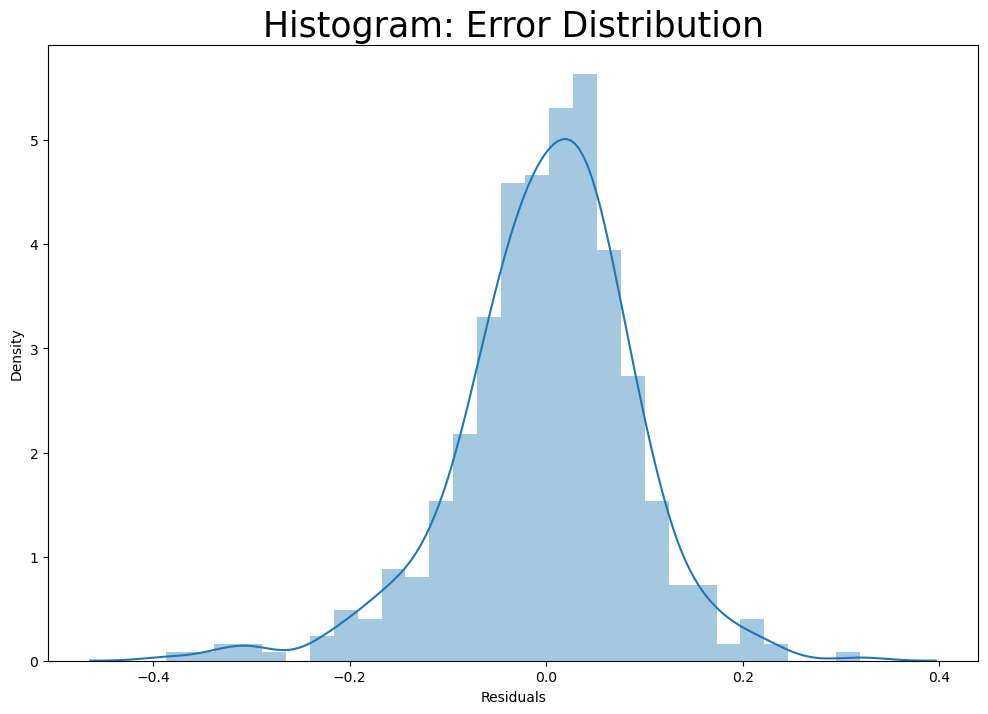

In [121]:
# Plotting the error distribution
plt.figure(figsize = (12, 8))
sns.distplot(res)
plt.xlabel('Residuals')
plt.title('Histogram: Error Distribution', fontdict={'fontsize': 25})
plt.show()

- From the above plot we can see that, the error terms are normally distributed with mean lying around 0. So, the assumption is true in this case.

### 6.2 Independent error terms

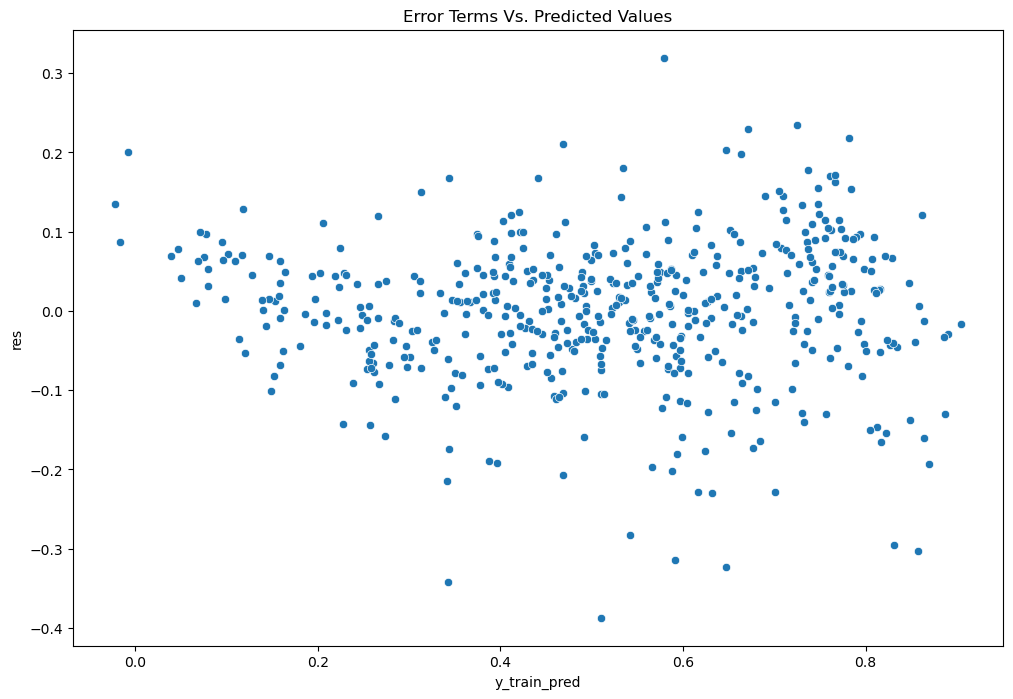

In [122]:
# Plotting scatter plot between 'ypred' and 'res' to check if there is any pattern present in the error terms.
plt.figure(figsize = (12, 8))
sns.scatterplot(x=y_train_pred, y=res)
plt.title('Error Terms Vs. Predicted Values')
plt.xlabel('y_train_pred')
plt.ylabel('res')
plt.show()

- From the above plot we can see that, error terms are distributed well and does not follow any particular pattern. So, the assumption is true in this case.

### 6.3 Homoscedasticity

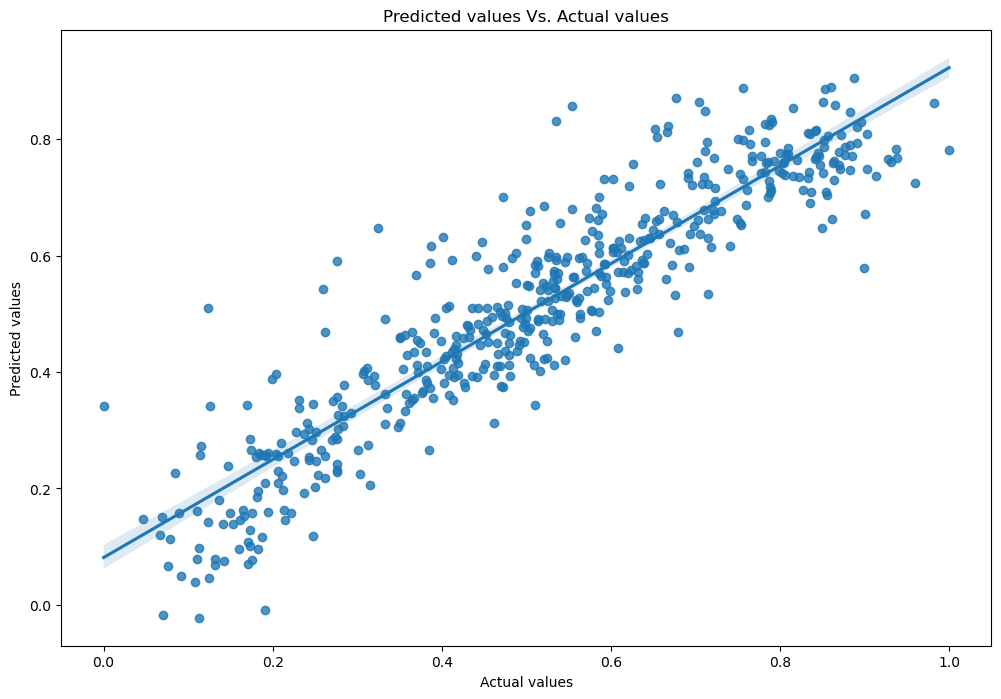

In [123]:
# plotting regplot between 'y_train' and 'y_train_pred' to check Homoscedasticity.
plt.figure(figsize = (12, 8))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted values Vs. Actual values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

- From the above plot we can see that, the residuals are equally distributed on both sides of the line. This proves the Homoscedasticity. So, this assumption is also true in this case.

## Step 7: Model Evaluation on test data

### 7.1 Test data scaling

In [124]:
# Applying 'scaler()' to all the columns except the 'yes-no'/'1-0' and 'dummy' variables.
df_test[list(NumVras.columns)] = scaler.transform(df_test[list(NumVras.columns)])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,1
536,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
300,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,1,0,0,0,0
222,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### 7.2 Dividing the test data into X and Y sets for evaluation

In [125]:
y_test = df_test.pop('cnt')
X_test = df_test

In [126]:
# Checking the heads
y_test.head()

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
Name: cnt, dtype: float64

In [127]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
536,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
300,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
222,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### 7.3 Filtering the test data with features present in the final model

In [128]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [129]:
X_test_new = X_test[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_Light Snow', 'weathersit_Mist']]

In [130]:
# Adding constant
X_test_new = sm.add_constant(X_test_new)

### 7.4 Prediction on test data

In [131]:
y_test_pred = lr_model.predict(X_test_new)

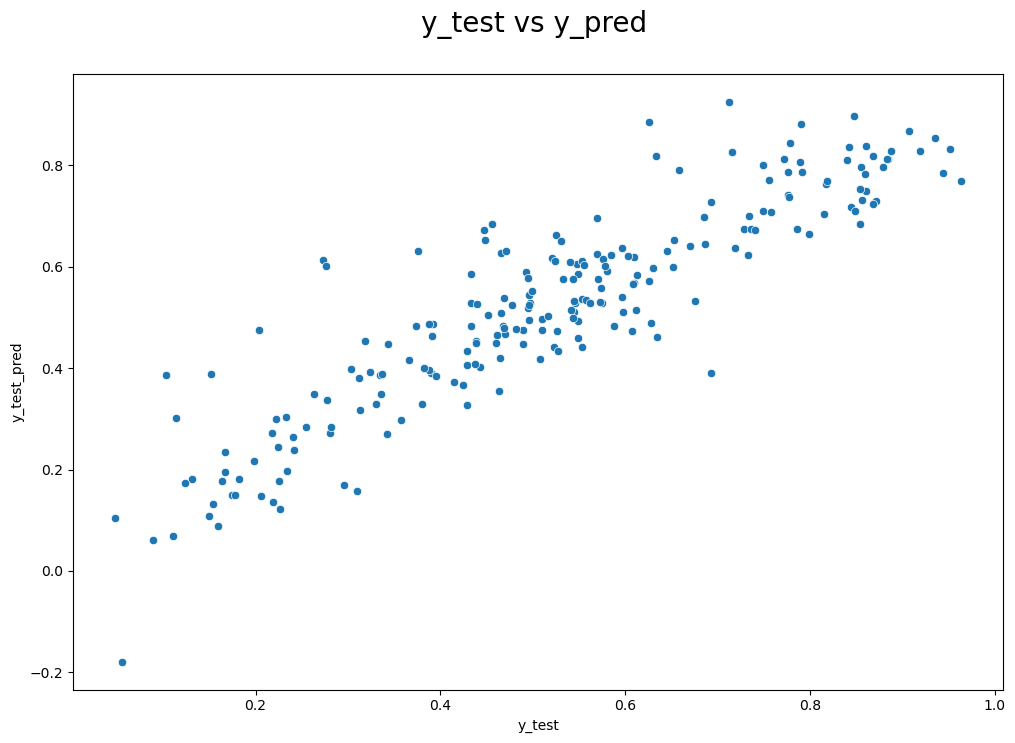

In [132]:
# Plotting a scatter plot between 'y_test' and 'y_test_pred' to check the spread.
plt.figure(figsize = (12, 8))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('y_test vs y_pred \n', fontsize = 20)              # Plot heading 
plt.xlabel('y_test')                                      # X-label
plt.ylabel('y_test_pred')                                 # Y-label
plt.show()

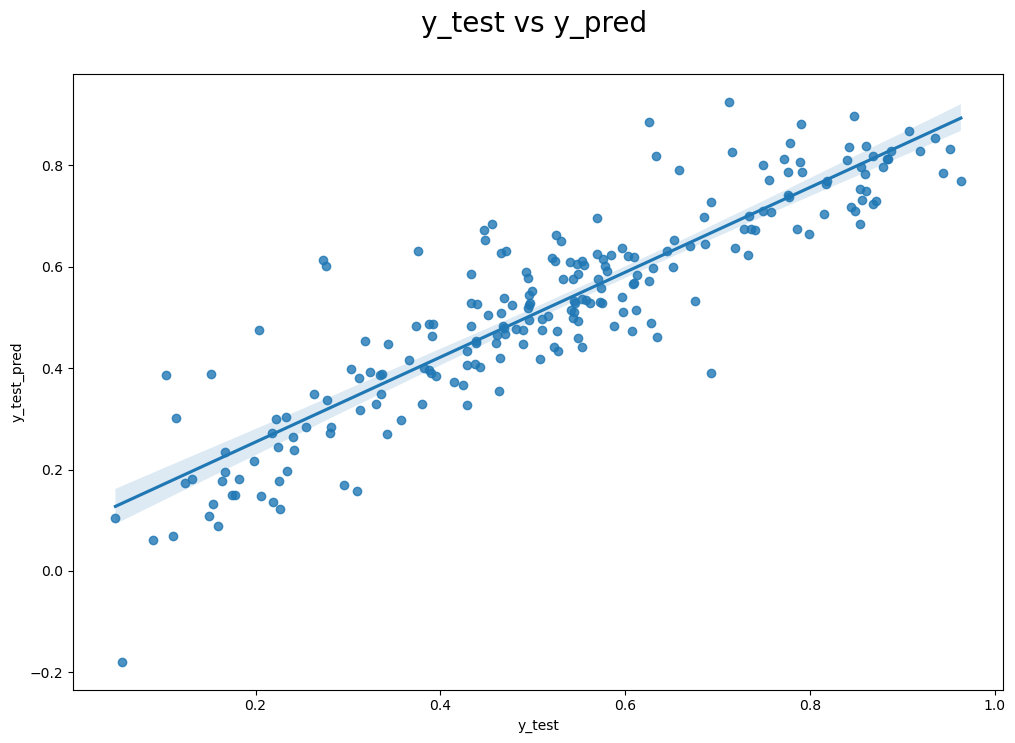

In [133]:
# Plotting a regplot plot between 'y_test' and 'y_test_pred'.
plt.figure(figsize = (12, 8))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('y_test vs y_pred \n', fontsize = 20)              # Plot heading 
plt.xlabel('y_test')                                      # X-label
plt.ylabel('y_test_pred')                                 # Y-label
plt.show()

- From the above plot we can see that, the points are nicely hugging the line. it shows the linear relation between the actual values and the predicted values.

### 7.5 R-Squared value for test data

In [134]:
# Importing 'r2_score' from 'sklearn' library.
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8029170032329545

In [136]:
# Calculating Adj.R-squared value for test data.
r2 = 0.8029170032329543    # r2 is the R-squared value calculated above.
n = X_test.shape[0]        # n is the number of rows in X
p = X_test.shape[1]        # p is the number of predictors

# We will find the Adj.R-squared value using the formula
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7738731931830739

- R-squared value for the test data is 0.802 which is close to the R-squared value of train data 0.841.
- Adj.R-squared value for the test data is 0.773 which is close to Adj.R-squared value of train data 0.838.
- So, from this we can conclude that our model is generalizing well on the test data.

### 7.6 Equation of best fitted line for our model

- Equation for best fit line for our model

cnt = 0.2444 + 0.2289(yr) - 0.0986(holiday) + 0.5717(temp) - 0.1764(hum) - 0.1945(windspeed) + 0.0745(season_summer) + 0.1258(season_winter) - 0.0380(mnth_January) - 0.0471(mnth_July) + 0.0941(mnth_September) - 0.2362(weathersit_Light Snow) - 0.0519(weathersit_Mist)